In [ ]:
!nvidia-smi

Fri Dec  2 08:37:29 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P0    29W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=20

In [ ]:
dataset1 = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/DataSets_Folder/Plant_Leaf_Disease",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 53622 files belonging to 39 classes.


In [ ]:
dataset2 = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/DataSets_Folder/Plant_leave_diseases_dataset_mini",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 4228 files belonging to 39 classes.


In [ ]:
class_names = dataset2.class_names
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Background_without_leaves',
 'Blueberry___healthy',
 'Cherry___Powdery_mildew',
 'Cherry___healthy',
 'Corn___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn___Common_rust',
 'Corn___Northern_Leaf_Blight',
 'Corn___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot'

In [ ]:
for image_batch, labels_batch in dataset2.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

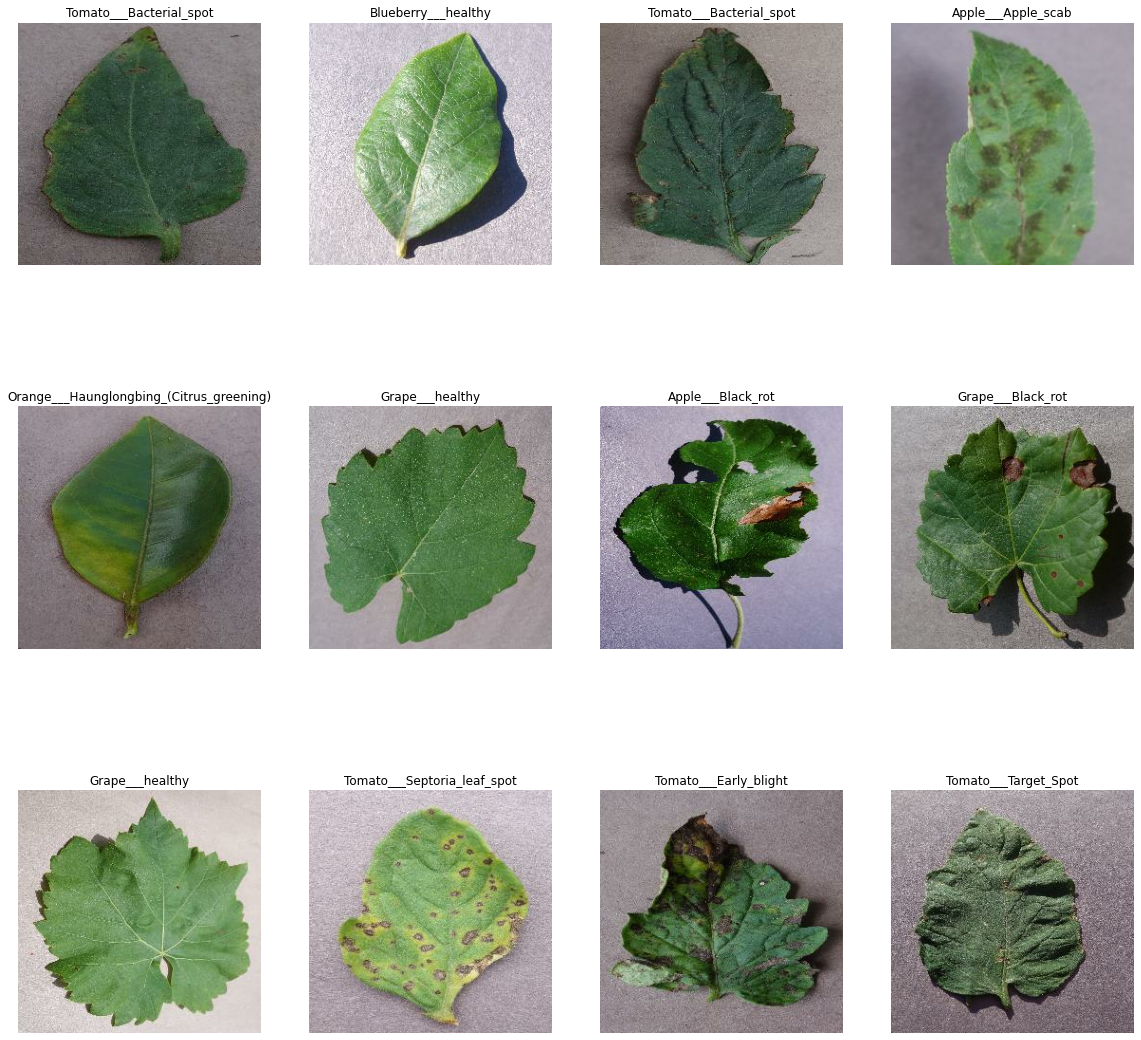

In [ ]:
plt.figure(figsize=(20, 20))
for image_batch, labels_batch in dataset2.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [ ]:
len(dataset1)

NameError: ignored

In [ ]:
len(dataset2)

In [ ]:
train_size1 = 0.8
len(dataset1)*train_size1

1340.8000000000002

In [ ]:
train_size2 = 0.8
len(dataset2)*train_size2

In [ ]:
train_ds1 = dataset1.take(1340) #train dataset
len(train_ds1)

1340

In [ ]:
train_ds2 = dataset2.take(106) #train dataset
len(train_ds2)

In [ ]:
test_ds1 = dataset1.skip(1340)
len(test_ds1)

336

In [ ]:
test_ds2 = dataset2.skip(106)
len(test_ds2)

27

In [ ]:
val_size1=0.1
len(dataset1)*val_size1

167.60000000000002

In [ ]:
val_size2=0.1
len(dataset2)*val_size2

13.3

In [ ]:
val_ds1 = test_ds1.take(167) #validation dataset
len(val_ds1)

167

In [ ]:
val_ds2 = test_ds2.take(13) #validation dataset
len(val_ds2)

13

In [ ]:
test_ds1 = test_ds1.skip(167) #test dataset
len(test_ds1)

169

In [ ]:
test_ds2 = test_ds2.skip(13) #test dataset
len(test_ds2)

14

In [ ]:
def get_dataset_partitions_tf(ds1, train_split1=0.8, val_split1=0.1, test_split1=0.1, shuffle=True, shuffle_size1=60000):
    assert (train_split1 + test_split1 + val_split1) == 1
    
    ds_size1 = len(ds1)
    
    if shuffle:
        ds1 = ds1.shuffle(shuffle_size1, seed=12)
    
    train_size1 = int(train_split1 * ds_size1)
    val_size1 = int(val_split1 * ds_size1)
    
    train_ds1 = ds1.take(train_size1)    
    val_ds1 = ds1.skip(train_size1).take(val_size1)
    test_ds1 = ds1.skip(train_size1).skip(val_size1)
    
    return train_ds1, val_ds1, test_ds1

In [ ]:
def get_dataset_partitions_tf(ds2, train_split2=0.8, val_split2=0.1, test_split2=0.1, shuffle=True, shuffle_size2=10000):
    assert (train_split2 + test_split2 + val_split2) == 1
    
    ds_size2 = len(ds2)
    
    if shuffle:
        ds2 = ds2.shuffle(shuffle_size2, seed=12)
    
    train_size2 = int(train_split2 * ds_size2)
    val_size2 = int(val_split2 * ds_size2)
    
    train_ds2 = ds2.take(train_size2)    
    val_ds2 = ds2.skip(train_size2).take(val_size2)
    test_ds2 = ds2.skip(train_size2).skip(val_size2)
    
    return train_ds2, val_ds2, test_ds2

In [ ]:
train_ds1, val_ds1, test_ds1 = get_dataset_partitions_tf(dataset1)

In [ ]:
train_ds2, val_ds2, test_ds2 = get_dataset_partitions_tf(dataset2)

In [ ]:
len(train_ds1)

1340

In [ ]:
len(train_ds2)

106

In [ ]:
len(val_ds1)

167

In [ ]:
len(val_ds2)

13

In [ ]:
len(test_ds1)

169

In [ ]:
len(test_ds2)

14

In [ ]:
train_ds1 = train_ds1.cache().shuffle(50000).prefetch(buffer_size=tf.data.AUTOTUNE) #optimised dataset for the training purpose
val_ds1 = val_ds1.cache().shuffle(10000).prefetch(buffer_size=tf.data.AUTOTUNE) #optimised dataset for the validation purpose
test_ds1 = test_ds1.cache().shuffle(10000).prefetch(buffer_size=tf.data.AUTOTUNE) #optimised dataset for the test purpose

In [ ]:
train_ds2 = train_ds2.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE) #optimised dataset for the training purpose
val_ds2 = val_ds2.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE) #optimised dataset for the validation purpose
test_ds2 = test_ds2.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE) #optimised dataset for the test purpose

In [ ]:
resize_and_rescale = tf.keras.Sequential([                      #Some preprocessing
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [ ]:
data_augmentation = tf.keras.Sequential([                       #Some preprocessing
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
train_ds2 = train_ds2.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 39

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [ ]:
model=tf.keras.models.load_model('/content/drive/MyDrive/saved_model/tvsa2.hdf5')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)       

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history2 = model.fit(
    train_ds2,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds2    
)

Epoch 1/150
106/106 [==============================] - 731s 365ms/step - loss: 3.6528 - accuracy: 0.0496 - val_loss: 3.6342 - val_accuracy: 0.0673
Epoch 2/150
106/106 [==============================] - 31s 292ms/step - loss: 3.4658 - accuracy: 0.0832 - val_loss: 3.1075 - val_accuracy: 0.1731
Epoch 3/150
106/106 [==============================] - 31s 292ms/step - loss: 3.0019 - accuracy: 0.1822 - val_loss: 2.8252 - val_accuracy: 0.2236
Epoch 4/150
106/106 [==============================] - 31s 292ms/step - loss: 2.5483 - accuracy: 0.2637 - val_loss: 2.4424 - val_accuracy: 0.2837
Epoch 5/150
106/106 [==============================] - 31s 292ms/step - loss: 2.2796 - accuracy: 0.3317 - val_loss: 2.1673 - val_accuracy: 0.3606
Epoch 6/150
106/106 [==============================] - 31s 292ms/step - loss: 2.1004 - accuracy: 0.3734 - val_loss: 1.8953 - val_accuracy: 0.4495
Epoch 7/150
106/106 [==============================] - 31s 289ms/step - loss: 1.9077 - accuracy: 0.4263 - val_loss: 1.7885 

In [ ]:
scores2 = model.evaluate(test_ds2)

14/14 [==============================] - 10s 29ms/step - loss: 0.6517 - accuracy: 0.8527


In [ ]:
scores2

[0.6517137289047241, 0.8526785969734192]

In [ ]:
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/saved_model/tvsa2.hdf5')

In [ ]:
acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']

loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

NameError: ignored

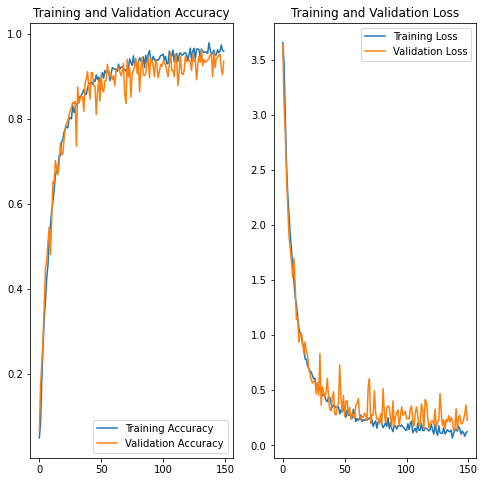

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc2, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc2, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss2, label='Training Loss')
plt.plot(range(EPOCHS), val_loss2, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('/content/drive/MyDrive/saved_model/traval_fig')
plt.show()

first image to predict
actual label: Orange___Haunglongbing_(Citrus_greening)
1/1 [==============================] - 0s 312ms/step
predicted label: Orange___Haunglongbing_(Citrus_greening)


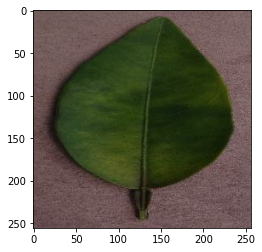

In [ ]:


import numpy as np
for images_batch, labels_batch in test_ds2.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])



In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 17ms/step


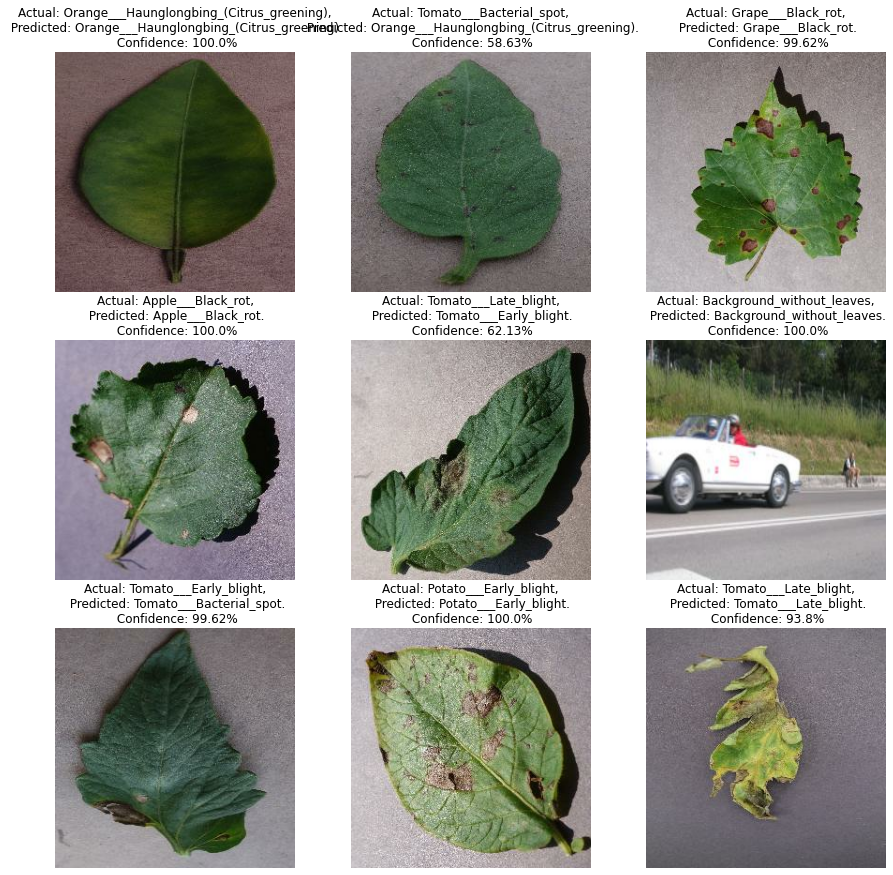

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds2.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [ ]:
predictions2 = model.predict(test_ds2)

14/14 [==============================] - 1s 32ms/step


In [ ]:
labels = []
predictions = []
for x,y in val_ds1:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(model.predict(x),1).numpy())

In [ ]:
import itertools 

In [ ]:
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
print("Train Accuracy  : {:.2f} %".format(history2.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='micro') * 100))

NameError: ignored

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix

<Figure size 1440x360 with 0 Axes>

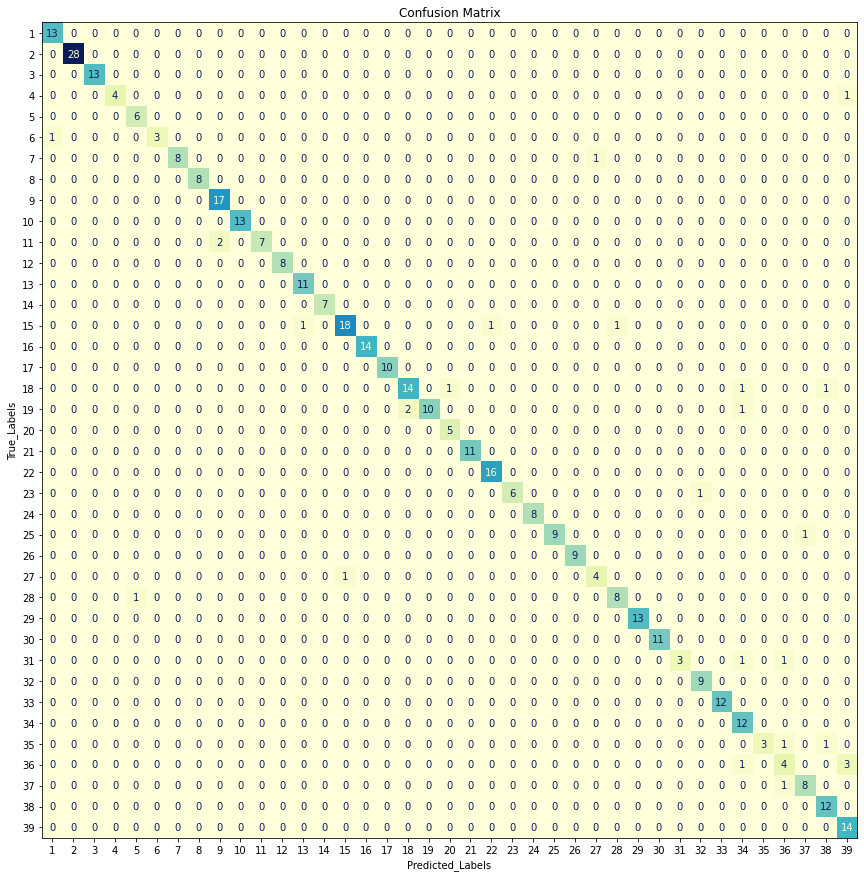

In [ ]:
plt.figure(figsize= (20,5))
cm = confusion_matrix(labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=list(range(1,40)))
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax,colorbar= False,cmap = 'YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel('Predicted_Labels')
plt.ylabel('True_Labels')
plt.savefig('/content/drive/MyDrive/saved_model/confusion_fig')
plt.show()
